### Description: In this script we will be visualizing some historical flood events (2020 and 2024) in Kenya using GloFAS historical reanalysis discharge data. 

###### Code is adapted from the following tutorial https://ecmwf-projects.github.io/copernicus-training-c3s/glofas-bangladesh-floods.html#setup-your-environment

#### Step 1: Import Libraries

In [1]:
import os
import cdsapi
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import urllib3
urllib3.disable_warnings() # disable API download warnings
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning) # disable xarray runtime warnings

#### Step 2: Set Data Directory 

In [2]:
DATADIR = os.path.join(os.pardir, 'data', 'methodology_1')
os.makedirs(DATADIR, exist_ok=True)

#### Step 3: Download GloFAS data for Kenya

In [3]:
# Set bounding box for Kenya (from  https://gist.github.com/graydon/11198540)
kenya_bbox = [5.5, 33.9, -4.7, 41.2]

In [5]:
# Will download datat from start of GloFAS (1979) until 2025
# Note: for this to run, you must have set up CDS API - see https://ewds.climate.copernicus.eu/how-to-api
# What time period are we interested in? 
start_year = 1979
end_year = 2024
combined_file = f"{DATADIR}/glofas-{start_year}_{end_year}.grib" # final file name
# Only run if combined file doesn't already exist
if not os.path.isfile(combined_file): 
    file_list = [] # empty list to store intermediate files that we will delet later
    for year in range(start_year, end_year+1):
        download_file = f"{DATADIR}/glofas-{year}.grib"
        if not os.path.isfile(download_file):
            c = cdsapi.Client()
            DATASET="cems-glofas-historical"
            REQUEST= {
                    "system_version": ["version_4_0"],
                    "hydrological_model": ["lisflood"],
                    "product_type": ["consolidated"],
                    "variable": ["river_discharge_in_the_last_24_hours"],
                    "hyear": [f"{year}"],
                    "hmonth": [f"{month:02d}" for month in range (1, 13)],
                    "hday": [f"{day:02d}" for day in range(1,32)],
                    "data_format": "grib2",
                    "download_format": "unarchived",
                    "area": kenya_bbox
                     }
            c.retrieve(DATASET,REQUEST).download(download_file)
        # Add completed file to file list
        file_list.append(download_file)
        
    # Combine datasets
    all_files = [f"{DATADIR}/glofas-{year}.grib" for year in range(start_year, end_year+1)]
    datasets = [xr.open_dataset(file, engine='cfgrib') for file in all_files]
    combined_dataset = xr.concat(datasets, dim='time')
    combined_dataset = combined_dataset.sortby('time') # datasets need to be sorted by time

    # Save combined dataset as a GRIB
    combined_dataset.to_netcdf(combined_file, engine='cfgrib')

    # Close datasets to free up resources
    for ds in datasets:
        ds.close()

    # Delete temporary files
    for file in file_list:
        if os.path.isfile(file):
            os.remove(file)

2025-03-13 12:20:06,576 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 12:20:06,778 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 12:20:06,779 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 12:20:06,780 INFO Request ID is 75dd7e6e-4f17-4bdf-8d26-d9e7f83f44f4
2025-03-13 12:20:06,878 INFO status has been updated to accepted
2025-03-13 12:20:21,173 INFO status has been updated to running
2025-03-13 12:26:26,633 INFO status has been updated to successful


5d2140b10cba50f8744d789b8ed29bde.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 12:26:33,377 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 12:26:33,600 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 12:26:33,601 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 12:26:33,602 INFO Request ID is 1ddf2a9e-6c9f-417f-a000-256cc2d9e44a
2025-03-13 12:26:33,696 INFO status has been updated to accepted
2025-03-13 12:26:38,743 INFO status has been updated to running
2025-03-13 12:32:57,968 INFO status has been updated to successful


4e8c8e7184ed7785c87ecc736ead5ef4.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 12:33:00,747 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 12:33:01,053 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 12:33:01,054 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 12:33:01,054 INFO Request ID is 190a945c-93d5-45b6-9d16-188e465ef8aa
2025-03-13 12:33:03,180 INFO status has been updated to accepted
2025-03-13 12:33:11,701 INFO status has been updated to running
2025-03-13 12:37:22,148 INFO status has been updated to successful


bd9c3027132f25256ad58701985a69ec.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 12:37:25,898 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 12:37:26,100 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 12:37:26,101 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 12:37:26,102 INFO Request ID is ba560d97-640f-4b85-9df3-3800aa3fae59
2025-03-13 12:37:26,197 INFO status has been updated to accepted
2025-03-13 12:38:16,172 INFO status has been updated to running
2025-03-13 12:41:45,074 INFO status has been updated to successful


18b4daea53106f75cb0843951cd15d1e.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 12:41:47,991 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 12:41:49,797 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 12:41:49,797 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 12:41:49,798 INFO Request ID is cda63b70-68b9-4739-9a23-ef4078b68708
2025-03-13 12:41:49,874 INFO status has been updated to accepted
2025-03-13 12:41:54,901 INFO status has been updated to running
2025-03-13 12:46:08,803 INFO status has been updated to successful


efa2165e8b73a03cbfae4789ccb61b53.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 12:46:12,814 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 12:46:13,096 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 12:46:13,097 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 12:46:13,098 INFO Request ID is b774c6a4-8a13-4dc5-8321-79c1624f10a0
2025-03-13 12:46:13,183 INFO status has been updated to accepted
2025-03-13 12:46:21,666 INFO status has been updated to running
2025-03-13 12:50:32,331 INFO status has been updated to successful


c79cbf3468a184a0ca24cf970bcc0b90.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 12:50:36,827 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 12:50:37,055 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 12:50:37,055 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 12:50:37,056 INFO Request ID is ed012925-5ee5-4ff6-ad1f-578f49c18d3f
2025-03-13 12:50:37,142 INFO status has been updated to accepted
2025-03-13 12:51:10,101 INFO status has been updated to running
2025-03-13 12:54:56,157 INFO status has been updated to successful


96f15f8c957638247cd09a027e739356.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 12:55:03,349 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 12:55:03,549 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 12:55:03,550 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 12:55:03,551 INFO Request ID is b252dc27-f6ba-40dc-a98a-af4f5f3c7b27
2025-03-13 12:55:03,625 INFO status has been updated to accepted
2025-03-13 12:55:53,694 INFO status has been updated to running
2025-03-13 12:59:22,622 INFO status has been updated to successful


34edaefce829025a8f6415dabdea6cf.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 12:59:26,612 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 12:59:26,998 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 12:59:26,999 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 12:59:27,000 INFO Request ID is 83f092f9-80be-4283-b7be-bde3eb851cea
2025-03-13 12:59:27,083 INFO status has been updated to accepted
2025-03-13 12:59:35,542 INFO status has been updated to running
2025-03-13 13:03:45,819 INFO status has been updated to successful


7b061c5c92fc81283333e7dd4d27e1dc.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 13:03:48,796 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 13:03:48,998 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 13:03:48,999 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 13:03:49,000 INFO Request ID is 54d3d032-5d55-48e2-a791-8bd927db414c
2025-03-13 13:03:49,094 INFO status has been updated to accepted
2025-03-13 13:03:54,140 INFO status has been updated to running
2025-03-13 13:12:08,423 INFO status has been updated to successful


2f55f0a973a91782d905cbf710c93463.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 13:12:15,135 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 13:12:15,373 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 13:12:15,373 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 13:12:15,374 INFO Request ID is 41f0d48d-e9db-44f7-a218-64d85c325a1c
2025-03-13 13:12:15,462 INFO status has been updated to accepted
2025-03-13 13:12:24,166 INFO status has been updated to running
2025-03-13 13:16:34,530 INFO status has been updated to successful


59cc2efa742cbf9b3fb9daf587b84771.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 13:16:38,654 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 13:16:38,850 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 13:16:38,851 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 13:16:38,851 INFO Request ID is 83a6cfd4-d2ba-4693-ab86-d8b52673979e
2025-03-13 13:16:38,930 INFO status has been updated to accepted
2025-03-13 13:17:28,889 INFO status has been updated to running
2025-03-13 13:20:57,821 INFO status has been updated to successful


3c67e0d5d014e6794ebeca725faef23a.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 13:21:01,487 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 13:21:01,747 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 13:21:01,749 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 13:21:01,749 INFO Request ID is b7fe8255-4640-4a71-9e92-50cc1fea95fb
2025-03-13 13:21:01,858 INFO status has been updated to accepted
2025-03-13 13:21:15,473 INFO status has been updated to running
2025-03-13 13:27:20,902 INFO status has been updated to successful


cd0a5d2de725da05fa356f9fe766be7d.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 13:27:23,868 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 13:27:24,147 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 13:27:24,148 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 13:27:24,149 INFO Request ID is deb80c66-dd73-49c7-959d-84bade4949ed
2025-03-13 13:27:24,399 INFO status has been updated to accepted
2025-03-13 13:27:29,383 INFO status has been updated to running
2025-03-13 13:35:43,952 INFO status has been updated to successful


5832efe3c4dd91258c0a80a341cda8a0.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 13:35:46,826 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 13:35:47,040 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 13:35:47,041 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 13:35:47,042 INFO Request ID is c019012e-9890-41bd-acfd-91c23ef23523
2025-03-13 13:35:47,122 INFO status has been updated to accepted
2025-03-13 13:36:00,733 INFO status has been updated to running
2025-03-13 13:40:05,917 INFO status has been updated to successful


dfcf4f8baffeeedad2786f5b5b233714.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 13:40:08,697 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 13:40:09,043 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 13:40:09,044 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 13:40:09,045 INFO Request ID is 656b1928-9200-4fa0-8b32-b3cb0729d8ef
2025-03-13 13:40:09,140 INFO status has been updated to accepted
2025-03-13 13:40:22,784 INFO status has been updated to running
2025-03-13 13:44:27,982 INFO status has been updated to successful


7336d9bc0ae902f052a949c1a49a151d.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 13:44:30,841 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 13:44:31,064 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 13:44:31,065 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 13:44:31,066 INFO Request ID is 3054b9cd-8e31-42d1-9441-f386ed0ee7fe
2025-03-13 13:44:31,163 INFO status has been updated to accepted
2025-03-13 13:44:44,785 INFO status has been updated to running
2025-03-13 13:48:49,979 INFO status has been updated to successful


5dc2c3e9c9f6736cf2226e5ca63c4b4c.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 13:48:55,279 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 13:48:55,495 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 13:48:55,496 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 13:48:55,497 INFO Request ID is 068357d3-f5b2-4246-b408-2f4c7ae80b14
2025-03-13 13:48:55,577 INFO status has been updated to accepted
2025-03-13 13:49:04,067 INFO status has been updated to running
2025-03-13 13:53:15,492 INFO status has been updated to successful


4aa07dd8ea93a1339bee17661d3ee72d.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 13:53:18,874 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 13:53:19,115 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 13:53:19,116 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 13:53:19,116 INFO Request ID is 1cd3a507-8217-4562-9c9f-8aef90218b47
2025-03-13 13:53:19,208 INFO status has been updated to accepted
2025-03-13 13:53:40,508 INFO status has been updated to running
2025-03-13 13:59:38,403 INFO status has been updated to successful


79f220540ca14616c08b1dedba1da6de.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 13:59:41,218 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 13:59:41,432 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 13:59:41,433 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 13:59:41,434 INFO Request ID is 2fe203e1-26c3-4358-922e-e45fa9e26153
2025-03-13 13:59:41,508 INFO status has been updated to accepted
2025-03-13 13:59:55,197 INFO status has been updated to running
2025-03-13 14:04:00,502 INFO status has been updated to successful


be4e02beb3b7b06797694adddae7af14.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 14:04:05,147 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 14:04:05,387 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 14:04:05,387 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 14:04:05,388 INFO Request ID is 9a70fe03-3b92-407c-968a-7dd0cd8fa410
2025-03-13 14:04:05,497 INFO status has been updated to accepted
2025-03-13 14:04:26,803 INFO status has been updated to running
2025-03-13 14:08:24,388 INFO status has been updated to successful


c6dac62a403adeee6b24d91fd923b748.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 14:08:28,300 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 14:08:28,594 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 14:08:28,595 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 14:08:28,596 INFO Request ID is f6e76d8a-9787-40bd-9e8b-a56211995d7a
2025-03-13 14:08:28,703 INFO status has been updated to accepted
2025-03-13 14:09:19,073 INFO status has been updated to running
2025-03-13 14:12:47,996 INFO status has been updated to successful


98961256bc000dc1d6c9d8013cbc178.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 14:12:56,821 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 14:12:57,050 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 14:12:57,051 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 14:12:57,051 INFO Request ID is 7840fe20-8064-4f0e-9c25-fabd8f992b85
2025-03-13 14:12:57,123 INFO status has been updated to accepted
2025-03-13 14:13:10,740 INFO status has been updated to running
2025-03-13 14:17:15,978 INFO status has been updated to successful


935c49b344d0f7c83e7c5924643d3090.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 14:17:19,312 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 14:17:19,516 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 14:17:19,517 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 14:17:19,517 INFO Request ID is 77518619-19fe-4961-9e7e-d7635eacdd92
2025-03-13 14:17:19,596 INFO status has been updated to accepted
2025-03-13 14:17:24,613 INFO status has been updated to running
2025-03-13 14:21:43,410 INFO status has been updated to successful


cd31c8cbe27e17a006f046784ec69799.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 14:21:46,045 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 14:21:46,242 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 14:21:46,243 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 14:21:46,244 INFO Request ID is 046b1bef-99a1-491e-9cdf-8c568061a921
2025-03-13 14:21:46,336 INFO status has been updated to accepted
2025-03-13 14:21:59,998 INFO status has been updated to running
2025-03-13 14:26:05,212 INFO status has been updated to successful


a1d65b1aa03dd24c7db8d9302175b95f.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 14:26:08,668 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 14:26:08,869 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 14:26:08,870 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 14:26:08,870 INFO Request ID is db6ee97b-64bd-4f94-9e90-d6319705e4e6
2025-03-13 14:26:08,961 INFO status has been updated to accepted
2025-03-13 14:26:22,560 INFO status has been updated to running
2025-03-13 14:30:27,767 INFO status has been updated to successful


1d94218602569e95b241075f562cd33c.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 14:30:32,171 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 14:30:32,381 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 14:30:32,382 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 14:30:32,383 INFO Request ID is f809de25-189c-4bae-8d05-b20dd3c66a0a
2025-03-13 14:30:32,476 INFO status has been updated to accepted
2025-03-13 14:30:37,495 INFO status has been updated to running
2025-03-13 14:36:51,492 INFO status has been updated to successful


8dcfb842ce619fe99a2e82cf811b3cca.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 14:36:55,750 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 14:36:55,982 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 14:36:55,983 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 14:36:55,984 INFO Request ID is 780168c3-42da-4dbc-a451-d44cff2382c7
2025-03-13 14:36:56,082 INFO status has been updated to accepted
2025-03-13 14:38:11,763 INFO status has been updated to running
2025-03-13 14:41:14,937 INFO status has been updated to successful


d6c4ff869b5db4f0c4824822d02a2727.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 14:41:22,845 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 14:41:23,099 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 14:41:23,100 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 14:41:23,100 INFO Request ID is 750e150d-6368-4753-a8db-ea095dbf2a33
2025-03-13 14:41:23,173 INFO status has been updated to accepted
2025-03-13 14:41:36,848 INFO status has been updated to running
2025-03-13 14:44:15,353 INFO status has been updated to successful


508fe86c33d772cd12bf7a354b2f6885.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 14:44:18,146 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 14:44:18,426 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 14:44:18,427 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 14:44:18,428 INFO Request ID is 1665cd47-c675-4f91-a7b2-548f4aa96fb7
2025-03-13 14:44:18,552 INFO status has been updated to accepted
2025-03-13 14:44:51,393 INFO status has been updated to running
2025-03-13 14:48:37,432 INFO status has been updated to successful


ae32ef2184ebaaeaf642362421365f09.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 14:48:45,666 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 14:48:45,899 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 14:48:45,900 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 14:48:45,901 INFO Request ID is 9c24954e-3332-4138-8be9-1d48928fbfef
2025-03-13 14:48:45,991 INFO status has been updated to accepted
2025-03-13 14:49:07,268 INFO status has been updated to running
2025-03-13 14:53:04,779 INFO status has been updated to successful


82a97128edf15193d2fc01b9113980ed.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 14:53:08,948 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 14:53:09,179 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 14:53:09,179 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 14:53:09,180 INFO Request ID is e3949f1e-d278-4b82-89da-2fbe1e055162
2025-03-13 14:53:09,273 INFO status has been updated to accepted
2025-03-13 14:53:42,019 INFO status has been updated to running
2025-03-13 14:59:28,290 INFO status has been updated to successful


ed716a125d11b488b4714fdc1b97ed72.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 14:59:31,736 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 14:59:31,933 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 14:59:31,934 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 14:59:31,935 INFO Request ID is e1711d01-279d-4267-a7e7-647b29d9cba5
2025-03-13 14:59:32,026 INFO status has been updated to accepted
2025-03-13 14:59:45,639 INFO status has been updated to running
2025-03-13 15:03:50,882 INFO status has been updated to successful


485fc03bfec5b0ef52ef58141d0cc548.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 15:03:55,109 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 15:03:55,388 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 15:03:55,389 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 15:03:55,390 INFO Request ID is 3ff86d1b-19ad-4bf8-b1e2-4c5e5dc7da61
2025-03-13 15:03:55,478 INFO status has been updated to accepted
2025-03-13 15:04:16,873 INFO status has been updated to running
2025-03-13 15:10:14,653 INFO status has been updated to successful


60ded826610e9530dc4bb37a9f164276.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 15:10:18,176 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 15:10:18,474 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 15:10:18,475 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 15:10:18,476 INFO Request ID is 6f0318a0-4e72-4335-a46b-0af519ab6166
2025-03-13 15:10:18,549 INFO status has been updated to accepted
2025-03-13 15:11:34,173 INFO status has been updated to running
2025-03-13 15:22:43,372 INFO status has been updated to successful


9f0203239a93c20ae74a585c41e963bd.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 15:22:46,168 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 15:22:46,413 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 15:22:46,414 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 15:22:46,415 INFO Request ID is 6c2f656a-4336-4615-bae0-ec3bfe478d6e
2025-03-13 15:22:46,489 INFO status has been updated to accepted
2025-03-13 15:25:38,605 INFO status has been updated to running
2025-03-13 16:13:20,880 INFO status has been updated to successful


a56f7b054249a9b7aae427dc8716ddff.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 16:13:26,931 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 16:13:27,127 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 16:13:27,128 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 16:13:27,129 INFO Request ID is faf5b900-df2c-4742-8343-b1df6d785c13
2025-03-13 16:13:27,225 INFO status has been updated to accepted
2025-03-13 16:13:32,290 INFO status has been updated to running
2025-03-13 16:13:42,291 INFO status has been updated to accepted
2025-03-13 16:16:20,730 INFO status has been updated to running
2025-03-13 16:19:47,747 INFO status has been updated to successful


f61b4a2245d8ddb57429621e6bdb0127.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 16:19:51,161 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 16:19:51,355 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 16:19:51,355 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 16:19:51,356 INFO Request ID is c83d2156-7726-4150-9ed7-6f69e5e8766b
2025-03-13 16:19:51,435 INFO status has been updated to accepted
2025-03-13 16:20:24,244 INFO status has been updated to running
2025-03-13 16:24:10,318 INFO status has been updated to successful


aaed119836f1382d822aca0d40251c91.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 16:24:17,967 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 16:24:18,192 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 16:24:18,193 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 16:24:18,193 INFO Request ID is e7395932-7b0e-4c2d-88dd-7160ae5008ca
2025-03-13 16:24:18,278 INFO status has been updated to accepted
2025-03-13 16:27:10,287 INFO status has been updated to running
2025-03-13 16:30:37,262 INFO status has been updated to successful


e6b83519491ab6944771cbdbad312259.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 16:30:43,871 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 16:30:44,063 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 16:30:44,064 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 16:30:44,065 INFO Request ID is ae650042-aa39-4d2b-89b5-abe4d904401f
2025-03-13 16:30:44,151 INFO status has been updated to accepted
2025-03-13 16:31:16,967 INFO status has been updated to running
2025-03-13 16:37:03,234 INFO status has been updated to successful


b260499ae29daf42c8602c52336c5fc5.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 16:37:05,799 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 16:37:06,019 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 16:37:06,020 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 16:37:06,021 INFO Request ID is d884ada1-91c5-4d0a-920e-115e1d1ad6e3
2025-03-13 16:37:06,090 INFO status has been updated to accepted
2025-03-13 16:37:14,864 INFO status has been updated to running
2025-03-13 16:43:25,419 INFO status has been updated to successful


ee6ec71618a2173b3da7490901b2f51b.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 16:43:28,849 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 16:43:29,149 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 16:43:29,150 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 16:43:29,151 INFO Request ID is 86bbc57c-1bae-40c7-8acf-e5a4ee37d3fe
2025-03-13 16:43:29,238 INFO status has been updated to accepted
2025-03-13 16:44:44,859 INFO status has been updated to running
2025-03-13 16:47:48,038 INFO status has been updated to successful


7781aa3678993eeca53203bc38201efb.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 16:47:50,649 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 16:47:50,914 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 16:47:50,915 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 16:47:50,916 INFO Request ID is d3124842-6a17-4306-a229-85afbc857a2b
2025-03-13 16:47:50,993 INFO status has been updated to accepted
2025-03-13 16:48:12,236 INFO status has been updated to running
2025-03-13 16:52:13,103 INFO status has been updated to successful


eaf0f3c4e8700bf46c71a5bcbdf8d9b6.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 16:52:15,935 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 16:52:16,139 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 16:52:16,139 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 16:52:16,140 INFO Request ID is 0d79db84-be85-4b56-90ec-5a161fe3bb1b
2025-03-13 16:52:16,219 INFO status has been updated to accepted
2025-03-13 16:52:29,755 INFO status has been updated to running
2025-03-13 16:56:35,193 INFO status has been updated to successful


d2d0aa29185aacbb1de08264d6d0c646.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 16:56:38,534 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 16:56:38,740 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 16:56:38,741 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 16:56:38,742 INFO Request ID is 442398d8-793a-42c6-abf7-02cce01f1988
2025-03-13 16:56:38,823 INFO status has been updated to accepted
2025-03-13 16:57:11,548 INFO status has been updated to running
2025-03-13 17:00:57,499 INFO status has been updated to successful


e927e3b069722af4ee1b29991851e589.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

2025-03-13 17:01:02,171 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-13 17:01:02,393 INFO [2024-02-01T00:00:00] Please note that accessing this dataset via CDS for time-critical operation is not advised or supported
2025-03-13 17:01:02,394 INFO [2024-02-01T00:00:00] Please note we suggest checking the list of known issues on the GloFAS wiki
[here](https://confluence.ecmwf.int/display/CEMS/GloFAS+-+Known+Issues)
before downloading the dataset.
2025-03-13 17:01:02,396 INFO Request ID is a1e81aa8-c699-40f8-98a9-93166c9e56a2
2025-03-13 17:01:03,580 INFO status has been updated to accepted
2025-03-13 17:02:19,183 INFO status has been updated to successful


325720b024902b9ebfae1e7da07e519a.grib:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

C:\Users\Mark.DESKTOP-UFHIN6T\anaconda3\envs\ews_scoping\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
C:\Users\Mark.DESKTOP-UFHIN6T\anaconda3\envs\ews_scoping\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
C:\Users\Mark.DESKTOP-UFHIN6T\anaconda3\envs\ews_scoping\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False

ValueError: unrecognized engine for to_netcdf: 'cfgrib'

In [9]:
glofas_data = xr.open_dataset(download_file, engine="cfgrib")
glofas_data

C:\Users\Mark.DESKTOP-UFHIN6T\anaconda3\envs\ews_scoping\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


<xarray.Dataset> Size: 44MB
Dimensions:     (time: 366, latitude: 204, longitude: 146)
Coordinates:
  * time        (time) datetime64[ns] 3kB 2024-01-01 2024-01-02 ... 2024-12-31
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
  * latitude    (latitude) float64 2kB 5.475 5.425 5.375 ... -4.625 -4.675
  * longitude   (longitude) float64 1kB 33.92 33.97 34.02 ... 41.07 41.12 41.17
    valid_time  (time) datetime64[ns] 3kB ...
Data variables:
    dis24       (time, latitude, longitude) float32 44MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-13T12:00 GRIB to CDM+CF via cfgrib-0.9.1...

In [14]:
# Create a simple plotting function that we can use throughout this notebook
def plot_map(
    plot_data,
    title='',
    cbar_label='',
    cmap='PuBu',
    extent=[33.9, 41.9, -4.7, 5.2],
    **pcolorkwargs
):
    # Populate the title and cbar_label with attributes from the plot_data if they have not been
    #  explicitly specified
    title = title or plot_data.attrs.get('long_name', title)
    cbar_label = cbar_label or plot_data.attrs.get('units', cbar_label)

    # Create a figure with a cartopy projection assigned which allows plotting geospatial data
    fig, ax = plt.subplots(
        1, 1, figsize = (18, 9), subplot_kw={'projection': ccrs.PlateCarree()}
    )

    # Plot the data on our figure
    im = ax.pcolormesh(
        plot_data.longitude, plot_data.latitude, plot_data, cmap=cmap, **pcolorkwargs
    )

    # Add some additional features
    ax.set_title(title, fontsize=16)
    ax.gridlines(draw_labels=False, linewidth=1, color='gray', alpha=0.5, linestyle='--') 
    ax.coastlines(color='black')

    # Add country borders in red
    ax.add_feature(cfeature.BORDERS, edgecolor='black', lw=1.5, ls=":")

    # Set the plot domain/extent
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    # Add a colour bar
    cbar = plt.colorbar(im,fraction=0.04, pad=0.01)
    cbar.set_label(cbar_label, fontsize=12) 

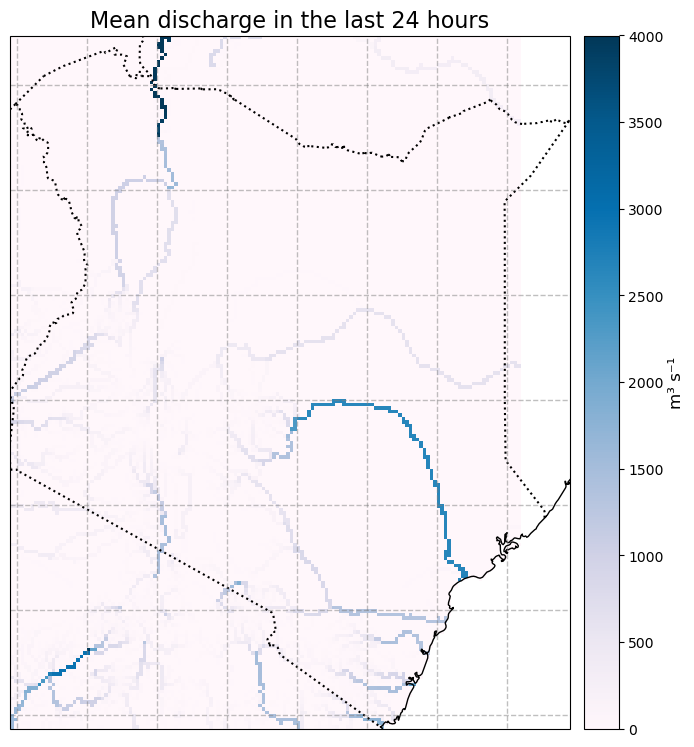

In [17]:
mean_data = glofas_data.dis24.max(dim='time')
mean_data = mean_data.assign_attrs(**glofas_data.dis24.attrs)
plot_map(
    mean_data,
    vmax=4e3, vmin=0,
    cbar_label = "m³ s⁻¹"
)